In [1]:
#to use 100% of the browser window
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

/var/folders/z6/bz261yzj6xgdy20gz4lpfn4r00018h/T/ipykernel_1895/785940443.py:2: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
#plotting and tabling
import matplotlib.pyplot as plt

#import astropy
import astropy
import astropy.units as u
from astropy.io import fits
from astropy.nddata import StdDevUncertainty
from astropy.table import QTable

#import specutils
import specutils
from specutils import Spectrum1D, SpectralRegion
from specutils.manipulation import extract_region

#import viztools
import jdaviz
from jdaviz import SpecViz

In [3]:
#customization of matplotlib style
plt.rcParams["figure.figsize"] = (10,5)
params={'legend.fontsize':'18','axes.labelsize':'18',
        'axes.titlesize':'18','xtick.labelsize':'18',
        'ytick.labelsize':'18','lines.linewidth':2,
        'axes.linewidth':2,'animation.html': 'html5',
        'figure.figsize':(8,6)}
plt.rcParams.update(params)
plt.rcParams.update({'figure.max_open_warning': 0})

In [4]:
print('astropy:',astropy.__version__)
print('specutils:',specutils.__version__)
print('jdaviz:',jdaviz.__version__)

astropy: 5.0.2
specutils: 1.7.0
jdaviz: 2.3.0


In [5]:
filelink = 'https://data.science.stsci.edu/redirect/JWST/jwst-data_analysis_tools/specviz_notebook_gui_interaction/basic_F150W_WFSSR_dit1_x1d.fits'
hdu = fits.open(filelink)

hdu.info()

Filename: /Users/gough/.astropy/cache/download/url/33545d5dbd50d26d5a9838f2d2259699/contents
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     259   ()      
  1  EXTRACT1D     1 BinTableHDU     47   3R x 9C   [D, D, D, D, D, J, D, D, D]   
  2  EXTRACT1D     2 BinTableHDU     47   19R x 9C   [D, D, D, D, D, J, D, D, D]   
  3  EXTRACT1D     3 BinTableHDU     47   78R x 9C   [D, D, D, D, D, J, D, D, D]   
  4  EXTRACT1D     4 BinTableHDU     47   107R x 9C   [D, D, D, D, D, J, D, D, D]   
  5  EXTRACT1D     5 BinTableHDU     47   110R x 9C   [D, D, D, D, D, J, D, D, D]   
  6  EXTRACT1D     6 BinTableHDU     47   107R x 9C   [D, D, D, D, D, J, D, D, D]   
  7  EXTRACT1D     7 BinTableHDU     47   105R x 9C   [D, D, D, D, D, J, D, D, D]   
  8  EXTRACT1D     8 BinTableHDU     47   112R x 9C   [D, D, D, D, D, J, D, D, D]   
  9  EXTRACT1D     9 BinTableHDU     47   107R x 9C   [D, D, D, D, D, J, D, D, D]   
 10  EXTRACT1D    10 BinTableHDU 

In [6]:
viz = SpecViz()
viz.app

Application(config='specviz', events=['call_viewer_method', 'close_snackbar_message', 'data_item_selected', 'd…

In [7]:
for i in range (2,19):
    spec_load = hdu[i+1].data

    #invert axis
    wave = spec_load['WAVELENGTH']
    flux = spec_load['FLUX']
    error = spec_load['ERROR']
    invwave = wave[::-1]
    invflux = flux[::-1]
    inverror = error[::-1]

    #mask the parts where the sensitivity in the bandpass is poor
    mask = ((invwave>1.34) & (invwave<1.66))

    spec1d = Spectrum1D(spectral_axis=invwave[mask]*u.um, 
                    flux=invflux[mask]*u.Jy, 
                    uncertainty=StdDevUncertainty(inverror[mask]*u.Jy)) #
    
    viz.load_spectrum(spec1d,"NIRISS 1D {}".format(str(i+1)))

    #print(spec1d)

In [8]:
dataout = viz.get_spectra()
spec1d_line = dataout["NIRISS 1D 6"]

/Users/gough/opt/miniconda3/envs/py3810/lib/python3.8/site-packages/jdaviz/configs/specviz/helper.py:63: UserWarning: Applying the value from the redshift slider to the output spectra. To avoid seeing this warning, explicitly set the apply_slider_redshift argument to True or False.
  warnings.warn("Applying the value from the redshift "


In [9]:
print(spec1d_line)

Spectrum1D (length=69)
flux:             [ 1.17e-06 Jy, ..., 1.3069e-06 Jy ],  mean=1.4173e-06 Jy
spectral axis:    [ 1.3402 um, ..., 1.6585 um ],  mean=1.4994 um
uncertainty:      [ StdDevUncertainty(0.), ..., StdDevUncertainty(0.) ]


In [10]:
try:
    region = viz.get_spectral_regions()
    print(region['Subset 1'])
except:
    print("No region defined in the GUI")

No region defined in the GUI


In [11]:
cont_region = SpectralRegion(1.35*u.um,1.42*u.um)
spec1d_el_code = extract_region(spec1d_line, cont_region)
print(spec1d_el_code)

Spectrum1D (length=15)
flux:             [ 1.6059e-06 Jy, ..., 1.3176e-06 Jy ],  mean=2.4411e-06 Jy
spectral axis:    [ 1.3543 um, ..., 1.4198 um ],  mean=1.387 um
uncertainty:      [ StdDevUncertainty(0.), ..., StdDevUncertainty(0.) ]


In [12]:
try:
    spec1d_el_viz = extract_region(spec1d_line, region['Subset 1'])
    print(spec1d_el_viz)
except:
    print("Region was not defined in the GUI")
    #define spec1d_el_viz as spec1d_el_code
    spec1d_el_viz = spec1d_el_code

Region was not defined in the GUI


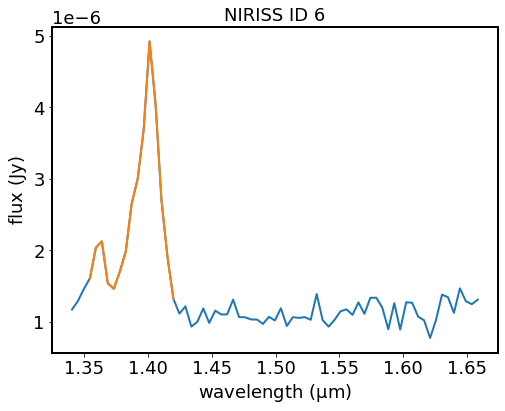

In [13]:
plt.plot(spec1d_line.spectral_axis,spec1d_line.flux)
plt.plot(spec1d_el_viz.spectral_axis,spec1d_el_viz.flux)

plt.xlabel("wavelength ({:latex})".format(spec1d_line.spectral_axis.unit))
plt.ylabel("flux ({:latex})".format(spec1d_line.flux.unit))
plt.title("NIRISS ID 6")
plt.show()


In [14]:
viz2 = SpecViz()
viz2.app

Application(config='specviz', events=['call_viewer_method', 'close_snackbar_message', 'data_item_selected', 'd…

In [15]:
viz2.load_spectrum(spec1d_line,"NIRISS 1D lines")

In [16]:
lt = QTable()
lt['linename'] = ['Hb','[OIII]1','[OIII]2']
lt['rest'] = [4861.3,4958.9,5006.8]*u.AA

viz2.load_line_list(lt)

In [17]:
spec1d_redshift = viz2.get_spectra()["NIRISS 1D lines"]
print(spec1d_redshift)

print()

if spec1d_redshift.redshift != 0.0:
    print("NIRISS 1D lines redshift=",spec1d_redshift.redshift)
else:
    print("Redshift was not defined in GUI. Defining it here.")
    spec1d_redshift.redshift = 1.798
    print("NIRISS 1D lines redshift=",spec1d_redshift.redshift)

Spectrum1D (length=69)
flux:             [ 1.17e-06 Jy, ..., 1.3069e-06 Jy ],  mean=1.4173e-06 Jy
spectral axis:    [ 1.3402 um, ..., 1.6585 um ],  mean=1.4994 um
uncertainty:      [ StdDevUncertainty(0.), ..., StdDevUncertainty(0.) ]

Redshift was not defined in GUI. Defining it here.
NIRISS 1D lines redshift= 1.7979999999999996


/Users/gough/opt/miniconda3/envs/py3810/lib/python3.8/site-packages/jdaviz/configs/specviz/helper.py:63: UserWarning: Applying the value from the redshift slider to the output spectra. To avoid seeing this warning, explicitly set the apply_slider_redshift argument to True or False.
  warnings.warn("Applying the value from the redshift "


In [18]:
viz3 = SpecViz()
viz3.app

Application(config='specviz', events=['call_viewer_method', 'close_snackbar_message', 'data_item_selected', 'd…

In [19]:
viz3.load_spectrum(spec1d_line,"NIRISS 1D lines")

In [20]:
try:
    dataout3 = viz3.get_spectra()
    spectrum = dataout3["NIRISS 1D lines"] #this is exactly the same as the spec1d_lines loaded a few cells above
    continuum = dataout3["continuum"]
except:
    print("Continuum has not been created. Setting it to 0")
    continuum = Spectrum1D(spectral_axis=spectrum.spectral_axis, flux= 0.*spectrum.flux)

Continuum has not been created. Setting it to 0


/Users/gough/opt/miniconda3/envs/py3810/lib/python3.8/site-packages/jdaviz/configs/specviz/helper.py:63: UserWarning: Applying the value from the redshift slider to the output spectra. To avoid seeing this warning, explicitly set the apply_slider_redshift argument to True or False.
  warnings.warn("Applying the value from the redshift "


In [21]:
spectrum_sub = spectrum - continuum

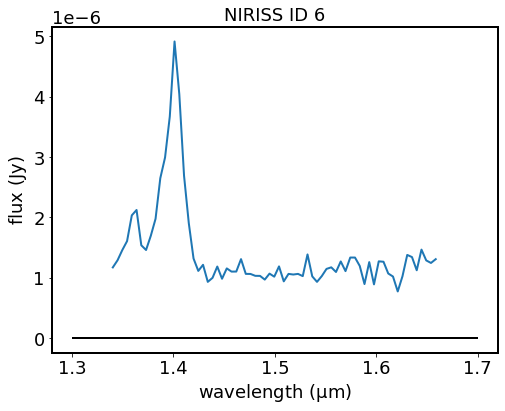

In [22]:
plt.plot(spectrum_sub.spectral_axis,spectrum_sub.flux)
plt.hlines(0,1.3,1.7,color='black')

plt.xlabel("wavelength ({:latex})".format(spectrum_sub.spectral_axis.unit))
plt.ylabel("flux ({:latex})".format(spectrum_sub.flux.unit))
plt.title("NIRISS ID 6")
plt.show()
